# Progetto di Introduzione alla Data Science
#### Belloni Laura 5075434
## Integrazione

In [273]:
import pandas as pd
import numpy as np

In [274]:
def percentuali_nulli(tabella):
    print(round(tabella.isnull().sum() / tabella.shape[0] * 100, 2))
    
def valori_distinti(tabella, colonna):
    print(tabella[colonna].unique())

def tipo_dato_colonna(tabella, colonna):
    print(tabella[colonna].dtype)

def percentuale_valore(tabella, colonna, valore):
    print((tabella[colonna] == valore).mean() * 100)

### Amazon

In [275]:
amazon_titles_1 = pd.read_csv("../dati/amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("../dati/amazon_titles_2.csv")

In [276]:
# left, mantiena i dati della tabella 1
amazon_titles_combinata = amazon_titles_1.merge(amazon_titles_2, how='left', left_on='title', right_on='title')

In [277]:
percentuali_nulli(amazon_titles_combinata)

id                       0.00
title                    0.00
type_x                   0.00
description_x            1.20
release_year_x           0.00
age_certification       66.44
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 85.85
imdb_id                  6.35
imdb_score              10.04
imdb_votes              10.16
tmdb_popularity          5.21
tmdb_score              19.38
show_id                 60.88
type_y                  60.88
director                67.06
cast                    63.54
country                 95.98
date_added              99.48
release_year_y          60.88
rating                  62.50
duration                60.88
listed_in               60.88
description_y           60.88
dtype: float64


In [278]:
# elimino le colonne doppie con nomi diversi

# id == show_id
amazon_titles_combinata.drop('show_id', axis=1, inplace=True)

# generes == listed_in
amazon_titles_combinata.drop('listed_in', axis=1, inplace=True)

# production_country == country
amazon_titles_combinata.drop('country', axis=1, inplace=True)

In [279]:
# age_certification e rating le integro, perchè entrambe hanno il 60% circa di valori nulli
amazon_titles_combinata['recommended_age'] = amazon_titles_combinata['age_certification'].fillna(amazon_titles_combinata['rating'])
# elimino le colonne originali
amazon_titles_combinata.drop(['age_certification', 'rating'], axis=1, inplace=True)

# nonostante i valori diversi delle sigle, il formato è coerente dopo l'integrazione in quanto ogni sigla ha il suo specigìfico significato
#valori_distinti(disney_titles_combinata, 'recommended_age')

In [280]:
# integro le colonne type in una nuova
amazon_titles_combinata['type'] = amazon_titles_combinata['type_x'].fillna(amazon_titles_combinata['type_y'])
# elimino originali
amazon_titles_combinata.drop(['type_x', 'type_y'], axis=1, inplace=True)

# applico lo stesso formato, sostituisco Movie con MOVIE e TV Show con SHOW
amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace({'Movie': 'MOVIE', 'TV Show': 'SHOW'})
#valori_distinti(amazon_titles_combinata, 'type')

In [281]:
# stesso procedimento per release_year e description, non serve applicare stesso formato (release year vado da float a int, description è generico)

amazon_titles_combinata['release_year'] = amazon_titles_combinata['release_year_x'].fillna(amazon_titles_combinata['release_year_y'])
amazon_titles_combinata.drop(['release_year_x', 'release_year_y'], axis=1, inplace=True)

amazon_titles_combinata['description'] = amazon_titles_combinata['description_x'].fillna(amazon_titles_combinata['description_y'])
amazon_titles_combinata.drop(['description_x', 'description_y'], axis=1, inplace=True)

In [282]:
# date_added 99% di valori nulli, eliminabile, non lo faccio perchè integro con disney e serve a Test statistico
#amazon_titles_combinata.drop('date_added', axis=1, inplace=True)

# tengo runtime perchè completo al 100% e anche season rispetto al numero di serie
#percentuale_valore(amazon_titles_combinata, 'type', 'SHOW') #(complementare a valore di nulli in season)

### Disney

In [283]:
disney_titles_1 = pd.read_csv("../dati/disney_titles_1.csv")
disney_titles_2 = pd.read_csv("../dati/disney_titles_2.csv")

In [284]:
# come per amazon, nel caso cambierò questa scelta
disney_titles_combinata = disney_titles_1.merge(disney_titles_2, how='left', left_on='title', right_on='title')

In [285]:
percentuali_nulli(disney_titles_combinata)

id                       0.00
title                    0.00
type_x                   0.00
description_x            0.49
release_year_x           0.00
age_certification       24.07
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 70.92
imdb_id                 25.71
imdb_score              27.72
imdb_votes              28.32
tmdb_popularity          0.87
tmdb_score               7.30
show_id                 41.99
type_y                  41.99
director                58.55
cast                    49.73
country                 49.40
date_added              42.05
release_year_y          41.99
rating                  42.05
duration                41.99
listed_in               41.99
description_y           41.99
dtype: float64


In [286]:
# elimino le colonne doppie con nomi diversi
disney_titles_combinata.drop('show_id', axis=1, inplace=True)
disney_titles_combinata.drop('listed_in', axis=1, inplace=True)
disney_titles_combinata.drop('country', axis=1, inplace=True)

In [287]:
# age_certification e rating le integro
# hanno il 20% e 40% circa di valori nulli
disney_titles_combinata['recommended_age'] = disney_titles_combinata['age_certification'].fillna(disney_titles_combinata['rating'])
disney_titles_combinata.drop(['age_certification', 'rating'], axis=1, inplace=True)
# come per amazon, nonostante i valori diversi delle sigle, il formato è coerente dopo l'integrazione in quanto ogni sigla ha il suo specifico significato

In [288]:
# salvo solo type_x che è 0% di valori nulli,  la rinomino type
disney_titles_combinata.rename(columns={'type_x': 'type'}, inplace=True)
disney_titles_combinata.drop(['type_y'], axis=1, inplace=True)

In [289]:
# stesso procedimento per release_year e description, non serve applicare stesso formato

disney_titles_combinata['release_year'] = disney_titles_combinata['release_year_x'].fillna(disney_titles_combinata['release_year_y'])
disney_titles_combinata.drop(['release_year_x', 'release_year_y'], axis=1, inplace=True)

disney_titles_combinata['description'] = disney_titles_combinata['description_x'].fillna(disney_titles_combinata['description_y'])
disney_titles_combinata.drop(['description_x', 'description_y'], axis=1, inplace=True)


In [290]:
# non ci sono colonne particolarmente vuote

# tengo runtime perchè completo al 100% e anche season rispetto al numero di serie
#percentuale_valore(disney_titles_combinata, 'type', 'SHOW')

### Amazon e Disney

In [291]:
# faccio outer join per non perdere dati, che sono già puliti.
# posso fare inner se non mi servono: director, cast, date_added e duration
# posso anche provare left, ma non molto rilevante secondo me (molto simile a outer, perchè sono tabelle molto simili)
titles = pd.merge(amazon_titles_combinata, disney_titles_combinata, how='outer', suffixes=('_amazon', '_disney'))

In [292]:
percentuali_nulli(titles)

id                       0.00
title                    0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 83.69
imdb_id                  9.15
imdb_score              12.60
imdb_votes              12.79
tmdb_popularity          4.58
tmdb_score              17.63
director                65.83
cast                    61.54
date_added              91.16
duration                58.14
recommended_age         37.57
type                     0.00
release_year             0.00
description              0.79
dtype: float64


In [293]:
# fromattazione recommended_age

# non valuato: NR, TV-NR
titles['recommended_age'] = titles['recommended_age'].replace({'NOT_RATE': 'NR', 'UNRATED': 'NR'})

# adatto a tutti: G, TV-G
titles['recommended_age'] = titles['recommended_age'].replace({'ALL': 'G'})

# maggiori di 16 anni: 16+
titles['recommended_age'] = titles['recommended_age'].replace({'16': '16+', 'AGES_16_': '16+'})

# maggiori di 17 anni: 17+
titles['recommended_age'] = titles['recommended_age'].replace({'NC-17': '17+'})

# maggiori di 18 anni: 18+
titles['recommended_age'] = titles['recommended_age'].replace({'AGES_18_': '18+'})


# elimino la distinzione TV o non

titles['recommended_age'] = titles['recommended_age'].replace({'TV-NR': 'NR'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-G': 'G'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-Y7': '7+'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-Y7-FV': 'PG-7'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-PG': 'PG'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-14': 'PG-14'})
titles['recommended_age'] = titles['recommended_age'].replace({'R': 'PG-17'})
titles['recommended_age'] = titles['recommended_age'].replace({'TV-MA': '18+'})


In [294]:
# percentuale di valori nulli:
# runtime                  0.00
# duration                58.14
# seasons                 83.69

# mantengo runtime come colonna principale ma non droppo le altre perchè contengono informazioni utili relative alle serie tv che voglio mantenere separate almeno per ora

titles[['duration', 'runtime', 'seasons']].head()

,duration,runtime,seasons
0,NaN,130,NaN
1,NaN,93,NaN
2,NaN,69,NaN
3,92 min,92,NaN
4,88 min,19,26.0


### Attenzione
Alcune sigle sono state associate ad altre per chiarezza dei dati ma questo non è in alcun modo un elenco di film con età consigliate realistiche<br>
Cosa comprende ogni sigla:<br>

|||
|------|-------------------------------------|
|NR    | NR, TV_NR, NOT_RATE, UNRATED|
|G     | G, ALL, TV-G|
|TV-Y  | TV-Y|
|7+    | 7+, TV-Y7|
|PG-7  | TV-Y7-FV|
|PG    | PG, TV-PG|
|PG-13 | PG-13|
|13+   | 13+|
|PG-14 | TV-14|
|PG-17 | R|
|16+   | 16+, 16, AGES_16_|
|17+   | NC-17|
|18+   | 18+, AGES_18_, TV-MA|


## Trasformazione

In [295]:
# sostituisco date_added con year_added e month_added

# converto in formato datetime
titles['date_added'] = pd.to_datetime(titles['date_added'])

# estraggo mese e anno
titles['month_added'] = titles['date_added'].dt.month_name()
titles['year_added'] = titles['date_added'].dt.year


# lo faccio anche sulle tabelle non combinate per semplificare l'analisi sucessiva al punto 4
# amazon
amazon_titles_combinata['date_added'] = pd.to_datetime(amazon_titles_combinata['date_added'])
amazon_titles_combinata['month_added'] = amazon_titles_combinata['date_added'].dt.month_name()
amazon_titles_combinata['year_added'] = amazon_titles_combinata['date_added'].dt.year
# disney
disney_titles_combinata['date_added'] = pd.to_datetime(disney_titles_combinata['date_added'])
disney_titles_combinata['month_added'] = disney_titles_combinata['date_added'].dt.month_name()
disney_titles_combinata['year_added'] = disney_titles_combinata['date_added'].dt.year

In [296]:
# associo un singolo genere a un numero
'''
# manipolazione di colonna di lista di stringhe
string = ', '.join(titles['genres']).replace('[','').replace(']','').replace("'",'').replace(",","") #tolgo simboli
converted_string = pd.Series(string.split())
distinct_string = converted_string.unique()
#print(distinct_string) # oggetto

# dizionario che associa un numero ad ogni genere univoco
genres_map = {genere: numero for numero, genere in enumerate(distinct_string, start=1)}
#print(genres_map)

# converti le stringhe nella colonna 'genres' in liste di generi
import ast
titles['genres'] = titles['genres'].apply(ast.literal_eval)

# associo la mappa alla colonna
titles['genres_number'] = titles['genres'].apply(lambda lista_generi: [genres_map[genere] for genere in lista_generi])

# converto in stringa e stampo
titles['genres_number_str'] = titles['genres_number'].apply(str)
valori_distinti(titles, 'genres_number_str')
'''

'\n# manipolazione di colonna di lista di stringhe\nstring = \', \'.join(titles[\'genres\']).replace(\'[\',\'\').replace(\']\',\'\').replace("\'",\'\').replace(",","") #tolgo simboli\nconverted_string = pd.Series(string.split())\ndistinct_string = converted_string.unique()\n#print(distinct_string) # oggetto\n\n# dizionario che associa un numero ad ogni genere univoco\ngenres_map = {genere: numero for numero, genere in enumerate(distinct_string, start=1)}\n#print(genres_map)\n\n# converti le stringhe nella colonna \'genres\' in liste di generi\nimport ast\ntitles[\'genres\'] = titles[\'genres\'].apply(ast.literal_eval)\n\n# associo la mappa alla colonna\ntitles[\'genres_number\'] = titles[\'genres\'].apply(lambda lista_generi: [genres_map[genere] for genere in lista_generi])\n\n# converto in stringa e stampo\ntitles[\'genres_number_str\'] = titles[\'genres_number\'].apply(str)\nvalori_distinti(titles, \'genres_number_str\')\n'

In [297]:
# associo un insieme di generi a un numero
#'''
# creo la mappa
distinct_values_colonna = titles['genres'].unique()
genres_map = {valore: numero for numero, valore in enumerate(distinct_values_colonna, start=1)}

# applico la mappa alla colonna
titles['genres_number'] = titles['genres'].map(genres_map)

valori_distinti(titles, 'genres_number')
#'''

[   1    2    3 ... 2823 2824 2825]


## Esplorazione

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

#### distribuzione imdb_score per recommended_age

In [299]:
# gestione valori nulli
titles_no_null = titles.dropna(subset=['recommended_age'])

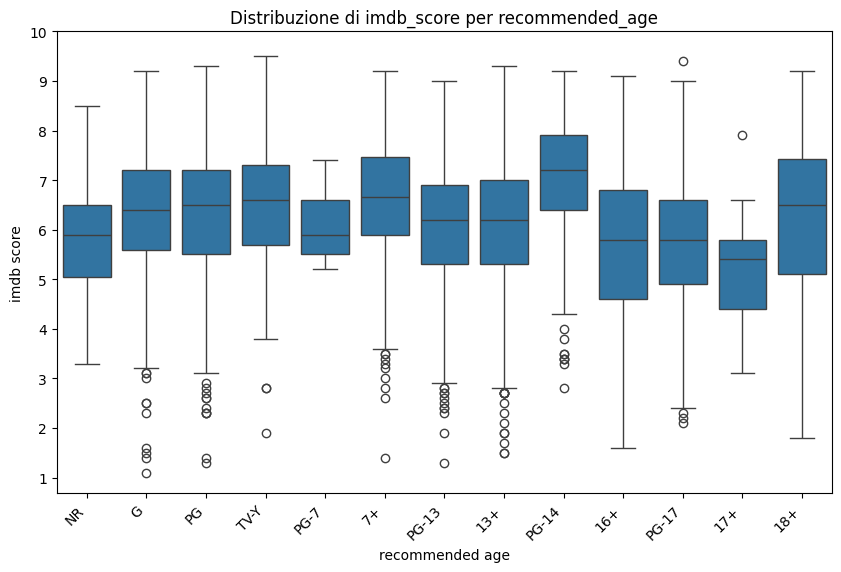

In [300]:
plt.figure(figsize=(10, 6))

# creo box plot
# recommended_age è age_certification
#titles_no_null.boxplot(column='imdb_score', by='recommended_age') #ordine casuale delle etichette
ordine_etichette = ['NR','G','PG','TV-Y','PG-7','7+','PG-13','13+','PG-14','16+','PG-17','17+','18+']
sns.boxplot(x='recommended_age', y='imdb_score', data=titles_no_null, order=ordine_etichette)

# stampo
plt.title('Distribuzione di imdb_score per recommended_age')
plt.xlabel('recommended age')
plt.ylabel('imdb score')
plt.xticks(rotation=45, ha='right') # ruota etichette di recommended age
plt.yticks(range(1, 11)) # stampa etichette dei numeri interi da 1 a 10 imdb score
plt.show()

In [301]:
# statistiche descrittive
desc_stats = titles_no_null.groupby('recommended_age')['imdb_score'].describe()
desc_stats_ordered = desc_stats.reindex(ordine_etichette)
print("\nStatistiche Descrittive per ogni Gruppo di recommended_age:\n")
print(desc_stats_ordered)

print()

count = desc_stats['count'].mean()
mean = desc_stats['mean'].mean()
print(f"media di 'count': {count}")
print(f"media di 'mean': {mean}")


Statistiche Descrittive per ogni Gruppo di recommended_age:

                  count      mean       std  min   25%   50%    75%  max
recommended_age                                                         
NR                 75.0  5.882667  1.069778  3.3  5.05  5.90  6.500  8.5
G                 891.0  6.341077  1.182872  1.1  5.60  6.40  7.200  9.2
PG               1182.0  6.352792  1.236506  1.3  5.50  6.50  7.200  9.3
TV-Y              143.0  6.481119  1.240794  1.9  5.70  6.60  7.300  9.5
PG-7               10.0  6.130000  0.781807  5.2  5.50  5.90  6.600  7.4
7+                226.0  6.535398  1.295937  1.4  5.90  6.65  7.475  9.2
PG-13             756.0  6.057011  1.241764  1.3  5.30  6.20  6.900  9.0
13+               793.0  6.033039  1.338755  1.5  5.30  6.20  7.000  9.3
PG-14             345.0  7.029565  1.178389  2.8  6.40  7.20  7.900  9.2
16+               549.0  5.643352  1.471759  1.6  4.60  5.80  6.800  9.1
PG-17            1278.0  5.684742  1.232842  2.1  4.90  5.80  

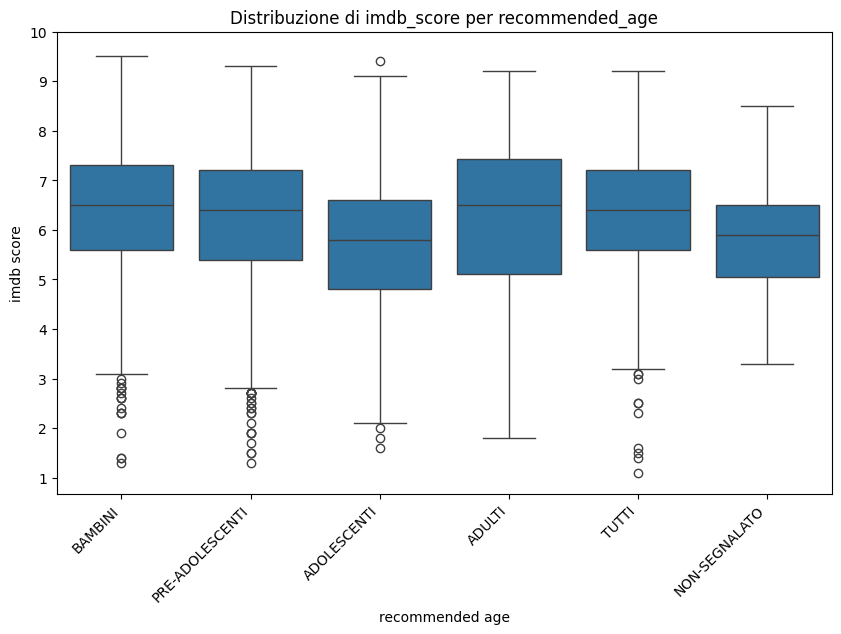

In [302]:
# boxplot più generico
# Sostituisci i valori nella colonna 'recommended_age' utilizzando .loc
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'TV-Y': 'BAMBINI', 'PG-7': 'BAMBINI', '7+': 'BAMBINI', 'PG': 'BAMBINI'})
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'PG-13': 'PRE-ADOLESCENTI', '13+': 'PRE-ADOLESCENTI', 'PG-14': 'PRE-ADOLESCENTI'})
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'16+': 'ADOLESCENTI', 'PG-17': 'ADOLESCENTI', '17+': 'ADOLESCENTI'})
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'18+': 'ADULTI'})
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'G': 'TUTTI'})
titles_no_null.loc[:, 'recommended_age'] = titles_no_null['recommended_age'].replace({'NR': 'NON-SEGNALATO'})


plt.figure(figsize=(10, 6))
ordine_etichette = ['BAMBINI','PRE-ADOLESCENTI','ADOLESCENTI','ADULTI','TUTTI','NON-SEGNALATO']
sns.boxplot(x='recommended_age', y='imdb_score', data=titles_no_null, order=ordine_etichette)
plt.title('Distribuzione di imdb_score per recommended_age')
plt.xlabel('recommended age')
plt.ylabel('imdb score')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(1, 11))
plt.show()

#### Numero di film e tv show negli anni

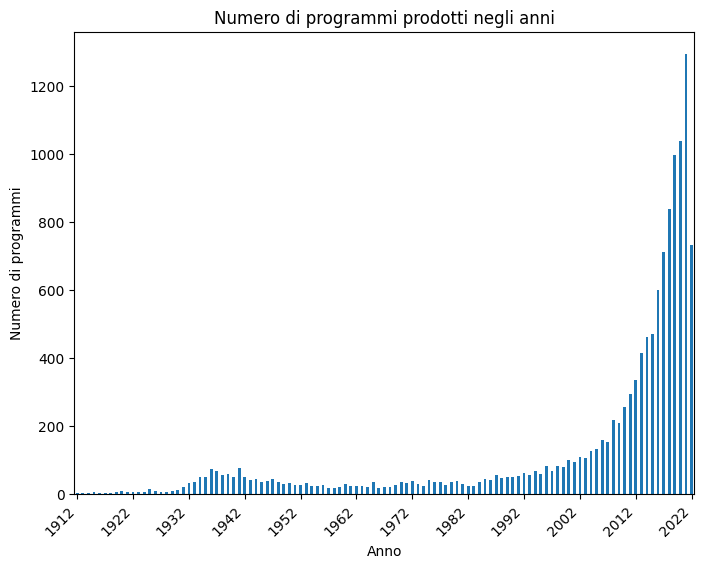

In [303]:
# numero di programmi PRODOTTI per anno
programs_per_year = titles['release_year'].value_counts().sort_index()

# grafico a barre
plt.figure(figsize=(8, 6))
programs_per_year.plot(kind='bar')

# stampa
plt.title('Numero di programmi prodotti negli anni')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, len(programs_per_year.index), 10), programs_per_year.index[::10])
plt.xlabel('Anno')
plt.ylabel('Numero di programmi')
plt.show()

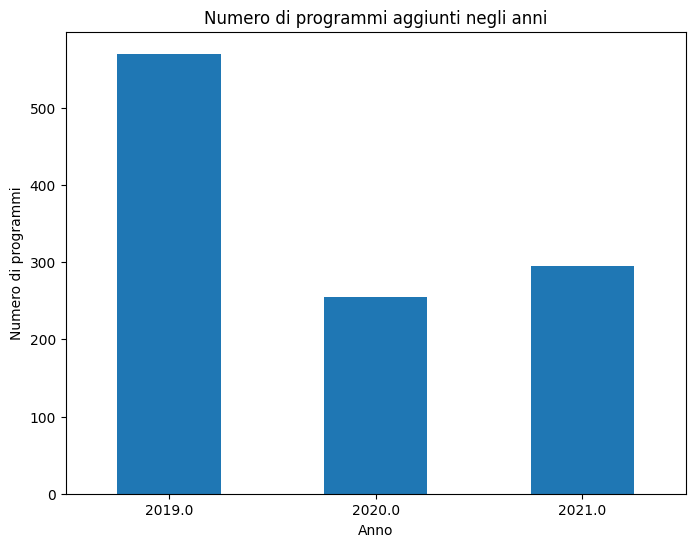

In [304]:
# numero di programmi AGGIUNTI per anno

# year_added si riferisce a date_added
programs_per_year = titles['year_added'].value_counts().sort_index()

# grafico a barre
plt.figure(figsize=(8, 6))
programs_per_year.plot(kind='bar')

plt.title('Numero di programmi aggiunti negli anni')
plt.xticks(rotation=0)
plt.xlabel('Anno')
plt.ylabel('Numero di programmi')
plt.show()

## Test statistico
 ci sono differenze significative tra la distribuzione di FILM suddivisi per anno di produzione o per anno di caricamento sulla piattaforma,  tenendo separati i dati delle due piattaforme?

Il test statistico calcola la probabilità che la mia ipotesi H0 sia vera<br>
Considero le ipotesi:<br>
H0 (ipotesi nulla): i test statistici NON hanno differenze significative<br>
HA (ipotesi complementare): i test statistici hanno differenze significative<br>

Ricorda
Il rifiuto dell’ipotesi nulla non prova che essa è vera. 
Si può concludere che non vi è sufficiente evidenza empirica contraria ad essa.


In [305]:
from scipy.stats import chi2_contingency

### Film

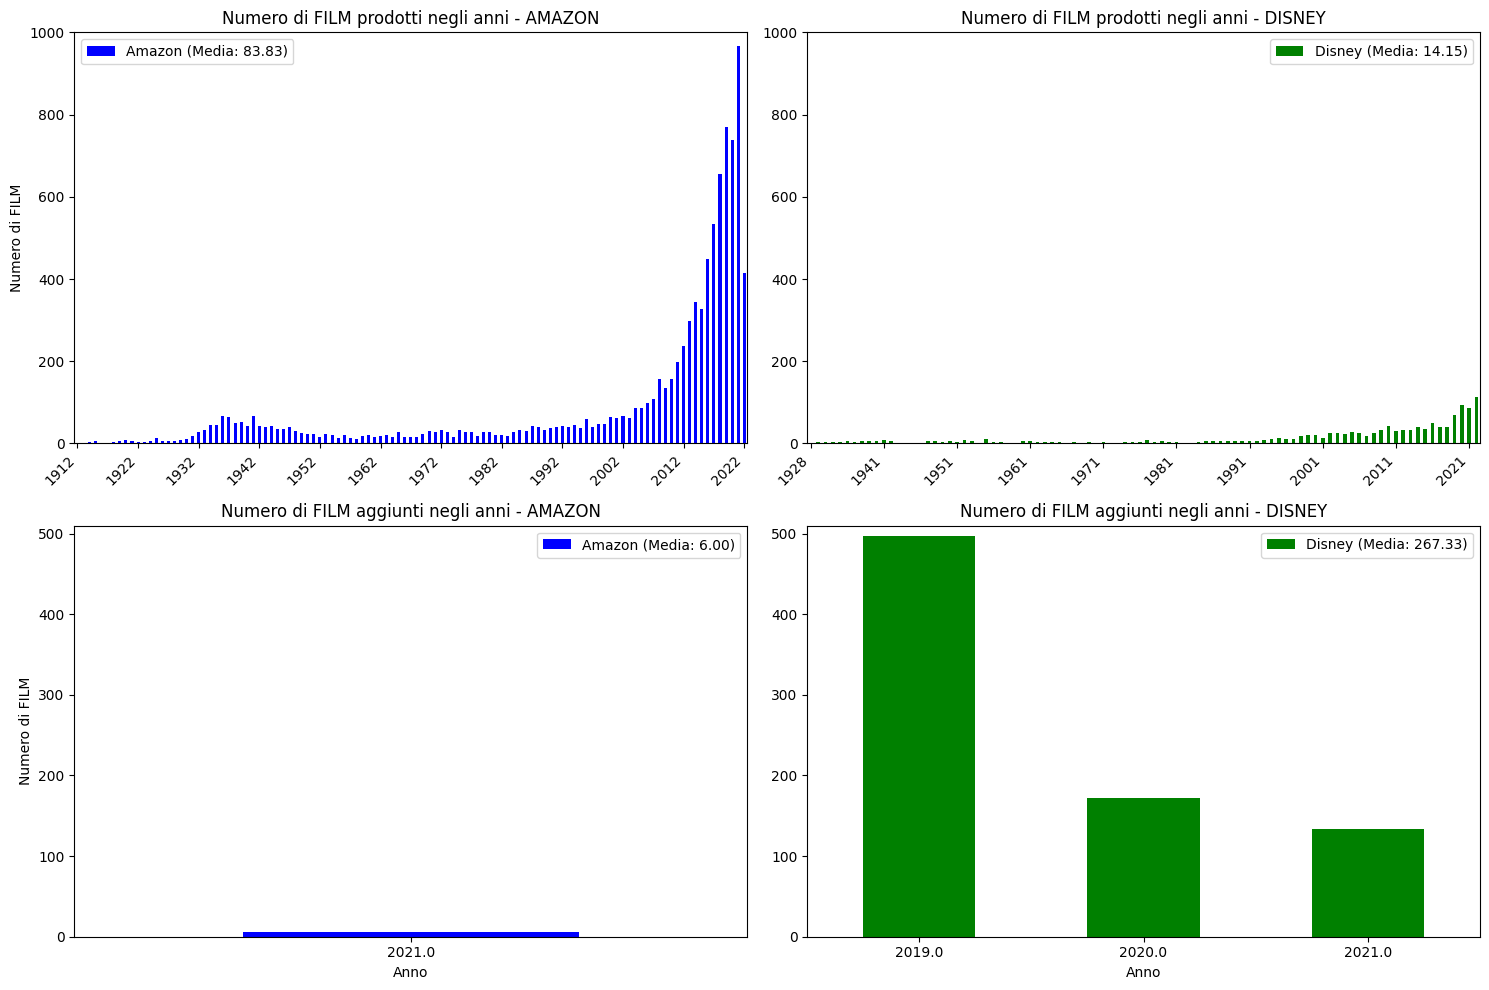

In [306]:
# confronto anno produzione con aggiunto amazon e disney

n_film_prodotti = 1000  # amazon ha un massimo di 1000, disney ha 120
n_film_aggiunti = 510  # amazon ha un massimo di 6, disney ha 500

# film prodotti
film_titles_amazon = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']
film_titles_disney = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']
programs_per_year_amazon = film_titles_amazon['release_year'].value_counts().sort_index()
programs_per_year_disney = film_titles_disney['release_year'].value_counts().sort_index()

# film aggiunti
film_titles_amazon_added = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']
film_titles_disney_added = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']
programs_per_year_amazon_added = film_titles_amazon_added['year_added'].value_counts().sort_index()
programs_per_year_disney_added = film_titles_disney_added['year_added'].value_counts().sort_index()

# medie
avg_film_prodotti_amazon = programs_per_year_amazon.mean()
avg_film_prodotti_disney = programs_per_year_disney.mean()
avg_film_aggiunti_amazon = programs_per_year_amazon_added.mean()
avg_film_aggiunti_disney = programs_per_year_disney_added.mean()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# grafico 1: numero di film prodotti - Amazon
programs_per_year_amazon.plot(kind='bar', ax=axes[0, 0], color='blue', label=f'Amazon (Media: {avg_film_prodotti_amazon:.2f})')
axes[0, 0].set_xticks(range(0, len(programs_per_year_amazon.index), 10))
axes[0, 0].set_xticklabels(programs_per_year_amazon.index[::10], rotation=45, ha='right')
axes[0, 0].set_ylim(0, n_film_prodotti)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Numero di FILM')
axes[0, 0].set_title('Numero di FILM prodotti negli anni - AMAZON')
axes[0, 0].legend()

# grafico 2: numero di film prodotti - Disney
programs_per_year_disney.plot(kind='bar', ax=axes[0, 1], color='green', label=f'Disney (Media: {avg_film_prodotti_disney:.2f})')
axes[0, 1].set_xticks(range(0, len(programs_per_year_disney.index), 10))
axes[0, 1].set_xticklabels(programs_per_year_disney.index[::10], rotation=45, ha='right')
axes[0, 1].set_ylim(0, n_film_prodotti)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Numero di FILM prodotti negli anni - DISNEY')
axes[0, 1].legend()

# grafico 3: numero di film aggiunti - Amazon
programs_per_year_amazon_added.plot(kind='bar', ax=axes[1, 0], color='blue', label=f'Amazon (Media: {avg_film_aggiunti_amazon:.2f})')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].set_ylim(0, n_film_aggiunti)
axes[1, 0].set_xlabel('Anno')
axes[1, 0].set_ylabel('Numero di FILM')
axes[1, 0].set_title('Numero di FILM aggiunti negli anni - AMAZON')
axes[1, 0].legend()

# grafico 4: numero di film aggiunti - Disney
programs_per_year_disney_added.plot(kind='bar', ax=axes[1, 1], color='green', label=f'Disney (Media: {avg_film_aggiunti_disney:.2f})')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].set_ylim(0, n_film_aggiunti)
axes[1, 1].set_xlabel('Anno')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Numero di FILM aggiunti negli anni - DISNEY')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


#### 1. Film di Amazon

In [307]:
'''
# Amazon
anno_produzione = amazon_titles_combinata['release_year']
anno_caricamento = amazon_titles_combinata['year_added']

varianza_anno_produzione = np.var(anno_produzione, ddof=1)
varianza_anno_caricamento = np.var(anno_caricamento, ddof=1)

print(f"Varianza anno produzione: {varianza_anno_produzione}")
print(f"Varianza anno caricamento: {varianza_anno_caricamento}") 
'''
'''la varianza nulla indica che i valori in questo gruppo sono identici'''

'la varianza nulla indica che i valori in questo gruppo sono identici'

In [308]:
# Per poter utilizzare un test del chi-quadro 
# è opportuno trasformare le variabili da continue a categoriche, 
# quindi quantizziamo i dati
anno_pro_min = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']['release_year'].min()
anno_pro_max = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']['release_year'].max()
anno_car_min = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']['year_added'].min()
anno_car_max = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']['year_added'].max()

print(f"Amazon:\nIntervallo anno produzione: {anno_pro_min} - {anno_pro_max} \nIntervallo anno caricamento: {anno_car_min} - {anno_car_max}")

# Quantizzazione:
# 1. VERY OLD = [1912,1934]
# 2. OLD = [1934,1956]
# 3. MEDIUM = [1956,1978]
# 4. RECENT = [1978,2000]
# 5. VERY RECENT = [2000,2022]


# amazon anno di produzione
amazon_titles_combinata['release_year_quant'] = '' # nuova colonna
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1912, 1934, 'both'), 'release_year_quant'] = 'VERY OLD'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1935, 1955, 'both'), 'release_year_quant'] = 'OLD'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1956, 1977, 'both'), 'release_year_quant'] = 'MEDIUM'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1978, 1999, 'both'), 'release_year_quant'] = 'RECENT'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(2000, 2022, 'both'), 'release_year_quant'] = 'VERY RECENT'

# amazon anno di caricamento
amazon_titles_combinata['year_added_quant'] = '' # nuova colonna
amazon_titles_combinata.loc[amazon_titles_combinata['year_added'].between(2000, 2022, 'both'), 'year_added_quant'] = 'VERY RECENT'

valori_distinti(amazon_titles_combinata, 'release_year_quant')

Amazon:
Intervallo anno produzione: 1912 - 2022 
Intervallo anno caricamento: 2021.0 - 2021.0
['OLD' 'VERY OLD' 'MEDIUM' 'RECENT' 'VERY RECENT']


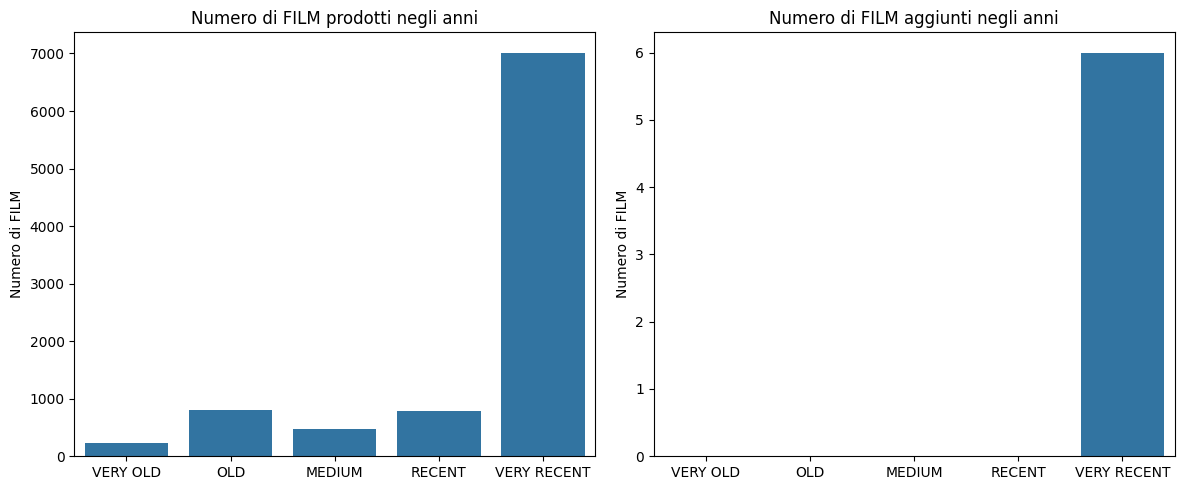

In [309]:
quantize = ['VERY OLD', 'OLD', 'MEDIUM', 'RECENT', 'VERY RECENT'] # ordine

film_data = amazon_titles_combinata[amazon_titles_combinata['type'] == 'MOVIE']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# grafico 1: Distribuzione di 'release_year_quant'
sns.countplot(x='release_year_quant', data=film_data, order=quantize, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Numero di FILM')
ax1.set_title('Numero di FILM prodotti negli anni')

# grafico 2: Distribuzione di 'year_added_quant'
sns.countplot(x='year_added_quant', data=film_data, order=quantize, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Numero di FILM')
ax2.set_title('Numero di FILM aggiunti negli anni')

plt.tight_layout()
plt.show()


In [310]:
# tabella di contingenza
film_contingency_table = pd.crosstab(film_data['release_year_quant'], film_data['year_added_quant'])

# test del chi-quadro
chi2, p_value, _, _ = chi2_contingency(film_contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p_value}")

# confronto il p-value con un livello di significatività 0.05
alpha = 0.05
if p_value < alpha:
    print("Rifiuto l'ipotesi nulla. Ci sono differenze significative.")
else:
    print("Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.")


Chi-squared test statistic: 1.9576539442264893
P-value: 0.7435474158359269
Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.


#### 1. Film di Disney

In [311]:
# Per poter utilizzare un test del chi-quadro 
# è opportuno trasformare le variabili da continue a categoriche, 
# quindi quantizziamo i dati

anno_pro_min = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']['release_year'].min()
anno_pro_max = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']['release_year'].max()
anno_car_min = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']['year_added'].min()
anno_car_max = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']['year_added'].max()

print(f"Disney:\nIntervallo anno produzione: {anno_pro_min} - {anno_pro_max} \nIntervallo anno caricamento: {anno_car_min} - {anno_car_max}")

# Quantizzazione:
# 1. VERY OLD = [1928,1946]
# 2. OLD = [1947,1965]
# 3. MEDIUM = [1966,1984]
# 4. RECENT = [1985,2003]
# 5. VERY RECENT = [2004,2022]


# disney anno di produzione
disney_titles_combinata['release_year_quant'] = '' # nuova colonna
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1928, 1946, 'both'), 'release_year_quant'] = 'VERY OLD'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1947, 1965, 'both'), 'release_year_quant'] = 'OLD'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1966, 1984, 'both'), 'release_year_quant'] = 'MEDIUM'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1985, 2003, 'both'), 'release_year_quant'] = 'RECENT'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(2004, 2022, 'both'), 'release_year_quant'] = 'VERY RECENT'

# disney anno di caricamento
disney_titles_combinata['year_added_quant'] = '' # nuova colonna
disney_titles_combinata.loc[disney_titles_combinata['year_added'].between(2004, 2022, 'both'), 'year_added_quant'] = 'VERY RECENT'

valori_distinti(disney_titles_combinata, 'release_year_quant')

Disney:
Intervallo anno produzione: 1928 - 2022 
Intervallo anno caricamento: 2019.0 - 2021.0
['OLD' 'VERY OLD' 'MEDIUM' 'RECENT' 'VERY RECENT']


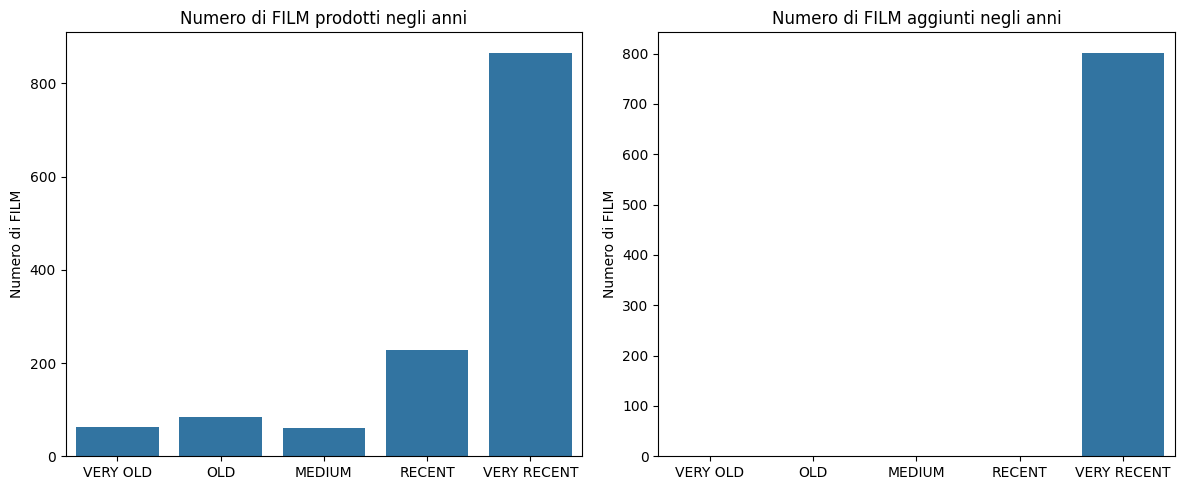

In [312]:
quantize = ['VERY OLD', 'OLD', 'MEDIUM', 'RECENT', 'VERY RECENT'] # ordine

film_data = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# grafico 1: Distribuzione di 'release_year_quant'
sns.countplot(x='release_year_quant', data=film_data, order=quantize, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Numero di FILM')
ax1.set_title('Numero di FILM prodotti negli anni')

# grafico 2: Distribuzione di 'year_added_quant'
sns.countplot(x='year_added_quant', data=film_data, order=quantize, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Numero di FILM')
ax2.set_title('Numero di FILM aggiunti negli anni')

plt.tight_layout()
plt.show()

In [313]:
# tabella di contingenza
film_contingency_table = pd.crosstab(film_data['release_year_quant'], film_data['year_added_quant'])

# test del chi-quadro
chi2, p_value, _, _ = chi2_contingency(film_contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p_value}")

# confronto il p-value con un livello di significatività 0.05
alpha = 0.05
if p_value < alpha:
    print("Rifiuto l'ipotesi nulla. Ci sono differenze significative.")
else:
    print("Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.")


Chi-squared test statistic: 162.337197919358
P-value: 4.609260460423442e-34
Rifiuto l'ipotesi nulla. Ci sono differenze significative.


### Serie TV

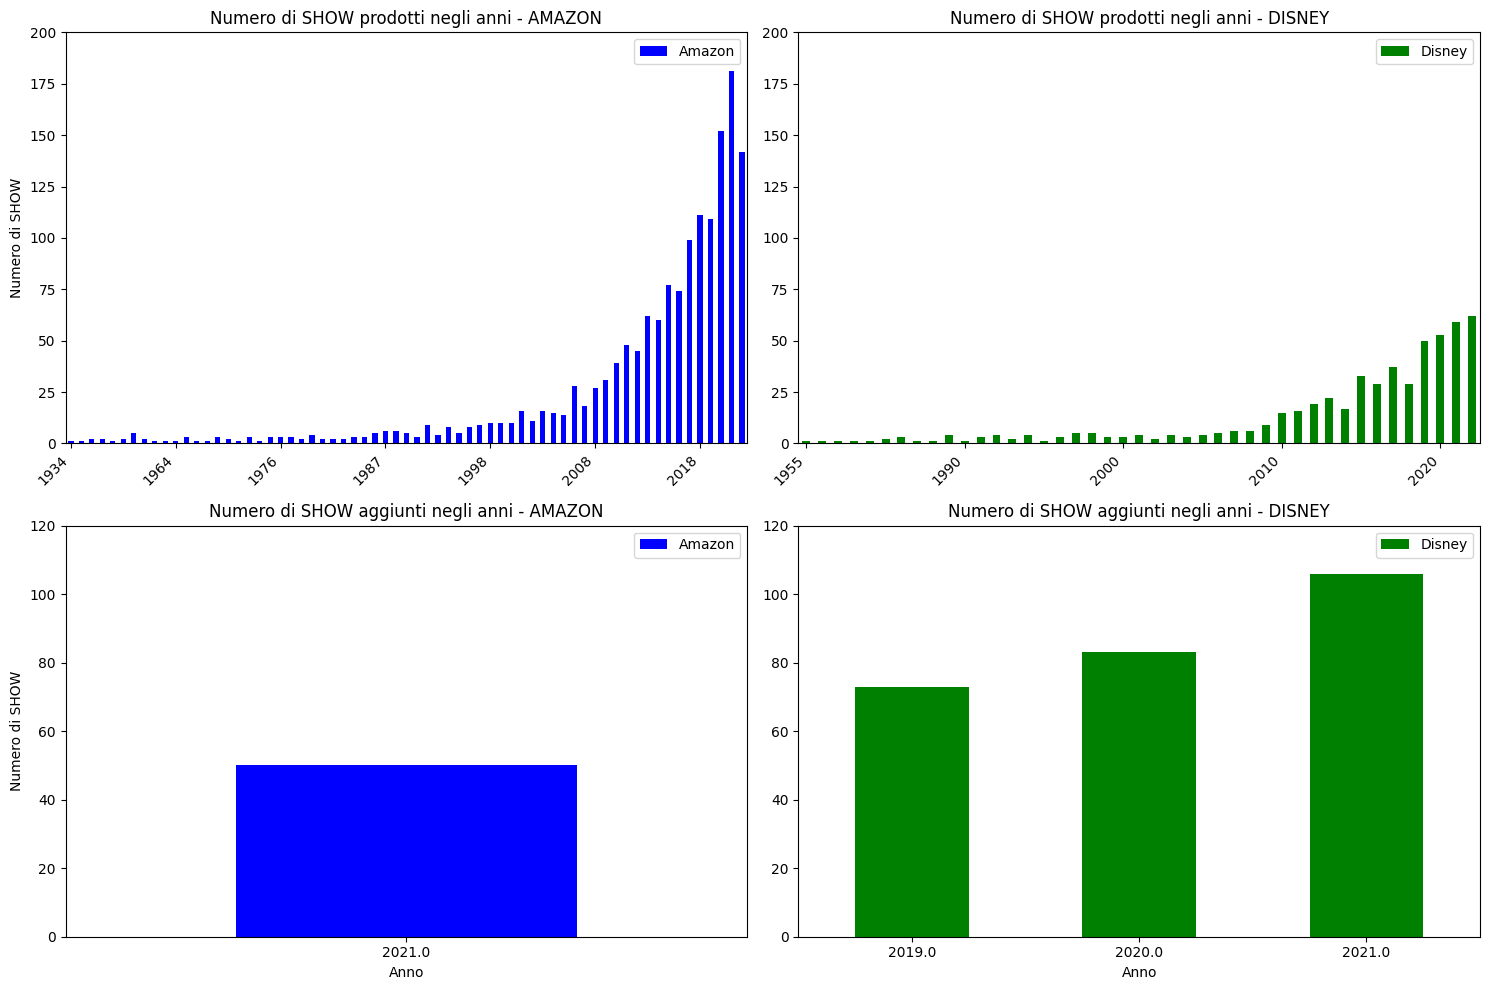

In [314]:
# confronto anno produzione con aggiunto amazon e disney

n_show_prodotti = 200  # amazon ha un massimo di 190, disney ha 65
n_show_aggiunti = 120  # amazon ha un massimo di 55, disney ha 110

# show prodotti
show_titles_amazon = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']
show_titles_disney = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']
programs_per_year_amazon = show_titles_amazon['release_year'].value_counts().sort_index()
programs_per_year_disney = show_titles_disney['release_year'].value_counts().sort_index()

# show aggiunti
show_titles_amazon_added = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']
show_titles_disney_added = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']
programs_per_year_amazon_added = show_titles_amazon_added['year_added'].value_counts().sort_index()
programs_per_year_disney_added = show_titles_disney_added['year_added'].value_counts().sort_index()

# medie
avg_show_prodotti_amazon = programs_per_year_amazon.mean()
avg_show_prodotti_disney = programs_per_year_disney.mean()
avg_show_aggiunti_amazon = programs_per_year_amazon_added.mean()
avg_show_aggiunti_disney = programs_per_year_disney_added.mean()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# grafico 1: numero di show prodotti - Amazon
programs_per_year_amazon.plot(kind='bar', ax=axes[0, 0], color='blue', label='Amazon')
axes[0, 0].set_xticks(range(0, len(programs_per_year_amazon.index), 10))
axes[0, 0].set_xticklabels(programs_per_year_amazon.index[::10], rotation=45, ha='right')
axes[0, 0].set_ylim(0, n_show_prodotti)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Numero di SHOW')
axes[0, 0].set_title('Numero di SHOW prodotti negli anni - AMAZON')
axes[0, 0].legend()

# grafico 2: numero di show prodotti - Disney
programs_per_year_disney.plot(kind='bar', ax=axes[0, 1], color='green', label='Disney')
axes[0, 1].set_xticks(range(0, len(programs_per_year_disney.index), 10))
axes[0, 1].set_xticklabels(programs_per_year_disney.index[::10], rotation=45, ha='right')
axes[0, 1].set_ylim(0, n_show_prodotti)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Numero di SHOW prodotti negli anni - DISNEY')
axes[0, 1].legend()

# grafico 3: numero di show aggiunti - Amazon
programs_per_year_amazon_added.plot(kind='bar', ax=axes[1, 0], color='blue', label='Amazon')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].set_ylim(0, n_show_aggiunti)
axes[1, 0].set_xlabel('Anno')
axes[1, 0].set_ylabel('Numero di SHOW')
axes[1, 0].set_title('Numero di SHOW aggiunti negli anni - AMAZON')
axes[1, 0].legend()

# grafico 4: numero di show aggiunti - Disney
programs_per_year_disney_added.plot(kind='bar', ax=axes[1, 1], color='green', label='Disney')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].set_ylim(0, n_show_aggiunti)
axes[1, 1].set_xlabel('Anno')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Numero di SHOW aggiunti negli anni - DISNEY')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


#### Show di Amazon

In [315]:
# Per poter utilizzare un test del chi-quadro 
# è opportuno trasformare le variabili da continue a categoriche, 
# quindi quantizziamo i dati

anno_pro_min = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']['release_year'].min()
anno_pro_max = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']['release_year'].max()
anno_car_min = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']['year_added'].min()
anno_car_max = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']['year_added'].max()

print(f"Amazon:\nIntervallo anno produzione: {anno_pro_min} - {anno_pro_max} \nIntervallo anno caricamento: {anno_car_min} - {anno_car_max}")

# Quantizzazione:
# 1. VERY OLD = [1928,1946]
# 2. OLD = [1947,1965]
# 3. MEDIUM = [1966,1984]
# 4. RECENT = [1985,2003]
# 5. VERY RECENT = [2004,2022]


# amazon anno di produzione
amazon_titles_combinata['release_year_quant'] = '' # nuova colonna
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1928, 1946, 'both'), 'release_year_quant'] = 'VERY OLD'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1947, 1965, 'both'), 'release_year_quant'] = 'OLD'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1966, 1984, 'both'), 'release_year_quant'] = 'MEDIUM'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(1985, 2003, 'both'), 'release_year_quant'] = 'RECENT'
amazon_titles_combinata.loc[amazon_titles_combinata['release_year'].between(2004, 2022, 'both'), 'release_year_quant'] = 'VERY RECENT'

# amazon anno di caricamento
amazon_titles_combinata['year_added_quant'] = '' # nuova colonna
amazon_titles_combinata.loc[amazon_titles_combinata['year_added'].between(2004, 2022, 'both'), 'year_added_quant'] = 'VERY RECENT'

valori_distinti(amazon_titles_combinata, 'release_year_quant')

Amazon:
Intervallo anno produzione: 1934 - 2022 
Intervallo anno caricamento: 2021.0 - 2021.0
['VERY OLD' 'OLD' '' 'MEDIUM' 'RECENT' 'VERY RECENT']


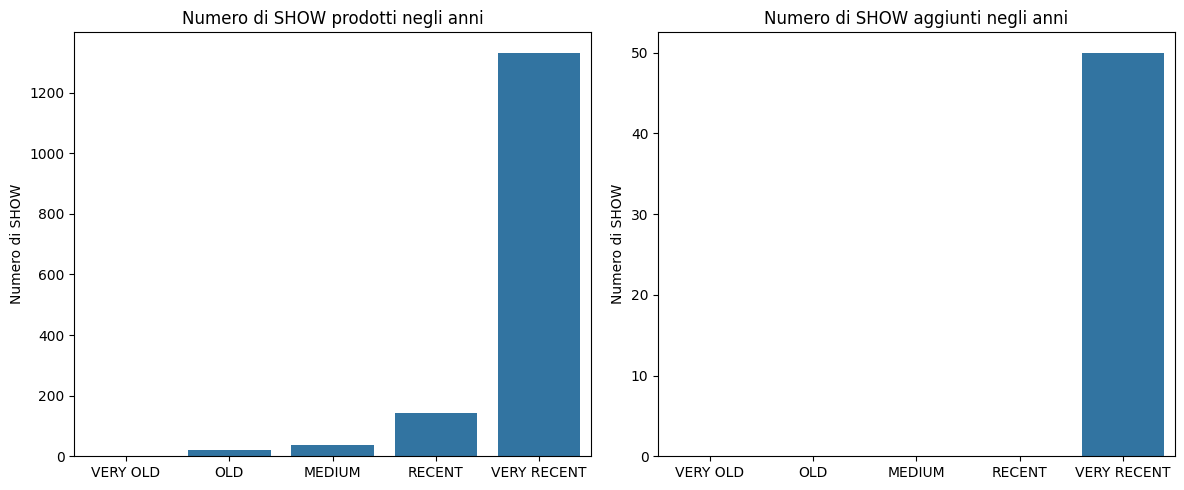

In [316]:
quantize = ['VERY OLD', 'OLD', 'MEDIUM', 'RECENT', 'VERY RECENT'] # ordine

show_data = amazon_titles_combinata[amazon_titles_combinata['type'] == 'SHOW']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# grafico 1: Distribuzione di 'release_year_quant'
sns.countplot(x='release_year_quant', data=show_data, order=quantize, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Numero di SHOW')
ax1.set_title('Numero di SHOW prodotti negli anni')

# grafico 2: Distribuzione di 'year_added_quant'
sns.countplot(x='year_added_quant', data=show_data, order=quantize, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Numero di SHOW')
ax2.set_title('Numero di SHOW aggiunti negli anni')

plt.tight_layout()
plt.show()

In [317]:
# tabella di contingenza
show_contingency_table = pd.crosstab(show_data['release_year_quant'], show_data['year_added_quant'])

# test del chi-quadro
chi2, p_value, _, _ = chi2_contingency(show_contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p_value}")

# confronto il p-value con un livello di significatività 0.05
alpha = 0.05
if p_value < alpha:
    print("Rifiuto l'ipotesi nulla. Ci sono differenze significative.")
else:
    print("Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.")


Chi-squared test statistic: 2.6162192964046063
P-value: 0.6239526513126749
Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.


#### Show di Disney

In [318]:
# Per poter utilizzare un test del chi-quadro 
# è opportuno trasformare le variabili da continue a categoriche, 
# quindi quantizziamo i dati

anno_pro_min = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']['release_year'].min()
anno_pro_max = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']['release_year'].max()
anno_car_min = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']['year_added'].min()
anno_car_max = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']['year_added'].max()

print(f"Disney:\nIntervallo anno produzione: {anno_pro_min} - {anno_pro_max} \nIntervallo anno caricamento: {anno_car_min} - {anno_car_max}")

# Quantizzazione:
# 1. VERY OLD = [1928,1946]
# 2. OLD = [1947,1965]
# 3. MEDIUM = [1966,1984]
# 4. RECENT = [1985,2003]
# 5. VERY RECENT = [2004,2022]


# disney anno di produzione
disney_titles_combinata['release_year_quant'] = '' # nuova colonna
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1928, 1946, 'both'), 'release_year_quant'] = 'VERY OLD'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1947, 1965, 'both'), 'release_year_quant'] = 'OLD'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1966, 1984, 'both'), 'release_year_quant'] = 'MEDIUM'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(1985, 2003, 'both'), 'release_year_quant'] = 'RECENT'
disney_titles_combinata.loc[disney_titles_combinata['release_year'].between(2004, 2022, 'both'), 'release_year_quant'] = 'VERY RECENT'

# disney anno di caricamento
disney_titles_combinata['year_added_quant'] = '' # nuova colonna
disney_titles_combinata.loc[disney_titles_combinata['year_added'].between(2004, 2022, 'both'), 'year_added_quant'] = 'VERY RECENT'

valori_distinti(disney_titles_combinata, 'release_year_quant')

Disney:
Intervallo anno produzione: 1955 - 2022 
Intervallo anno caricamento: 2019.0 - 2021.0
['OLD' 'VERY OLD' 'MEDIUM' 'RECENT' 'VERY RECENT']


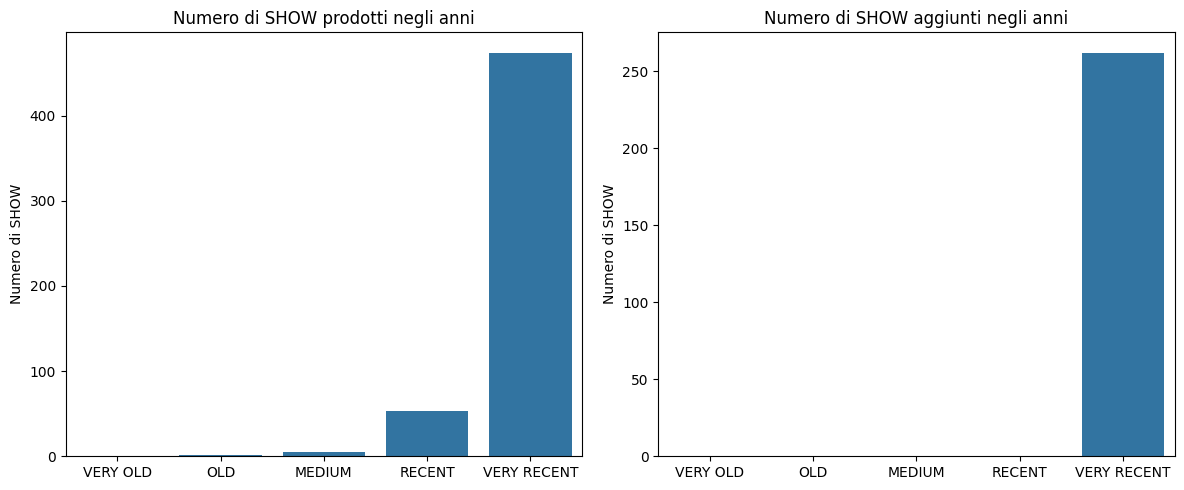

In [319]:
quantize = ['VERY OLD', 'OLD', 'MEDIUM', 'RECENT', 'VERY RECENT'] # ordine

show_data = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# grafico 1: Distribuzione di 'release_year_quant'
sns.countplot(x='release_year_quant', data=show_data, order=quantize, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Numero di SHOW')
ax1.set_title('Numero di SHOW prodotti negli anni')

# grafico 2: Distribuzione di 'year_added_quant'
sns.countplot(x='year_added_quant', data=show_data, order=quantize, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Numero di SHOW')
ax2.set_title('Numero di SHOW aggiunti negli anni')

plt.tight_layout()
plt.show()

In [320]:
# tabella di contingenza
show_contingency_table = pd.crosstab(show_data['release_year_quant'], show_data['year_added_quant'])

# test del chi-quadro
chi2, p_value, _, _ = chi2_contingency(show_contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p_value}")

# confronto il p-value con un livello di significatività 0.05
alpha = 0.05
if p_value < alpha:
    print("Rifiuto l'ipotesi nulla. Ci sono differenze significative.")
else:
    print("Non posso rifiutare l'ipotesi nulla. Non ci sono differenze significative.")


Chi-squared test statistic: 17.5784718753891
P-value: 0.0005372683781134756
Rifiuto l'ipotesi nulla. Ci sono differenze significative.


## OLAP

In [321]:
# Aggregare i dati di production_countries
import ast
titles['num_countries'] = titles['production_countries'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) and x != '[]' else 0)
quantize_production_countries = titles['num_countries'].unique().tolist()
print(quantize_production_countries)

[1, 2, 0, 3, 4, 5, 6, 7, 9]


In [322]:
# Aggregare i dati di recommended_age (creo una nuova colonna)
age_mapping = {
    'TV-Y': 'BAMBINI',
    'PG-7': 'BAMBINI',
    '7+': 'BAMBINI',
    'PG': 'BAMBINI',
    'PG-13': 'PRE-ADOLESCENTI',
    '13+': 'PRE-ADOLESCENTI',
    'PG-14': 'PRE-ADOLESCENTI',
    '16+': 'ADOLESCENTI',
    'PG-17': 'ADOLESCENTI',
    '17+': 'ADOLESCENTI',
    '18+': 'ADULTI',
    'G': 'TUTTI',
    'NR': 'NON-SEGNALATO'
}

titles['recommended_age_q'] = titles['recommended_age'].map(age_mapping)
titles['recommended_age_q'].fillna('NON-SEGNALATO', inplace=True)

quantize_recommended_age = titles['recommended_age_q'].dropna().unique().tolist()
print(quantize_recommended_age)


['BAMBINI', 'NON-SEGNALATO', 'ADOLESCENTI', 'PRE-ADOLESCENTI', 'TUTTI', 'ADULTI']


In [323]:
# ristampo il box-plot che ora potrebbe essere ancora più chiaro e generico
'''
plt.figure(figsize=(10, 6))

#titles.boxplot(column='imdb_score', by='recommended_age_q') #ordine casuale delle etichette
ordine_etichette = ['BAMBINI', 'PRE-ADOLESCENTI', 'ADOLESCENTI', 'ADULTI', 'TUTTI', 'NON-SEGNALATO']
sns.boxplot(x='recommended_age_q', y='imdb_score', data=titles, order=ordine_etichette)

# stampo
plt.title('Distribuzione di imdb_score per recommended_age_q')
plt.xlabel('recommended age_q')
plt.ylabel('imdb score')
plt.xticks(rotation=45, ha='right') # ruota etichette di recommended age
plt.yticks(range(1, 11)) # stampa etichette dei numeri interi da 1 a 10 imdb score
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\n\n#titles.boxplot(column='imdb_score', by='recommended_age_q') #ordine casuale delle etichette\nordine_etichette = ['BAMBINI', 'PRE-ADOLESCENTI', 'ADOLESCENTI', 'ADULTI', 'TUTTI', 'NON-SEGNALATO']\nsns.boxplot(x='recommended_age_q', y='imdb_score', data=titles, order=ordine_etichette)\n\n# stampo\nplt.title('Distribuzione di imdb_score per recommended_age_q')\nplt.xlabel('recommended age_q')\nplt.ylabel('imdb score')\nplt.xticks(rotation=45, ha='right') # ruota etichette di recommended age\nplt.yticks(range(1, 11)) # stampa etichette dei numeri interi da 1 a 10 imdb score\nplt.show()\n"

In [324]:
# Aggregare i dati di type
quantize_type = titles['type'].unique().tolist()
print(quantize_type)

['MOVIE', 'SHOW']


In [325]:
quantize_type = ['MOVIE','SHOW']
quantize_recommended_age = ['BAMBINI','PRE-ADOLESCENTI','ADOLESCENTI','ADULTI','TUTTI','NON-SEGNALATO']
quantize_production_countries = [0,1,2,3,4,5,6,7,9]

In [326]:
# 2 valori possibili per type
# 10 valori possibili per production_countries
# 6 valori possibili per recommended_age_q

OLAP = np.zeros((len(quantize_production_countries), len(quantize_recommended_age), len(quantize_type)))

for z in range(0, len(quantize_type)):
    titles_type = titles[titles['type'] == quantize_type[z]]
    for j in range(0, len(quantize_recommended_age)):
        for i in range(0, len(quantize_production_countries)):
            OLAP[i, j, z] = np.sum((titles_type['recommended_age_q'] == quantize_recommended_age[j]) &
                                   (titles_type['num_countries'] == quantize_production_countries[i]))

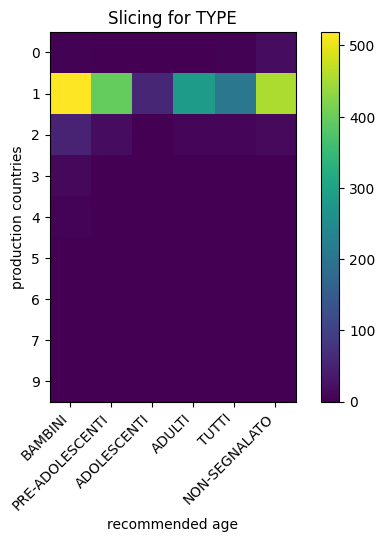

In [327]:
# TYPE

variabile = 1
# 0 = MOVIE, 1 = SHOW

type = OLAP[:,:,variabile] 
plt.figure()
plt.imshow(type) 
plt.colorbar()
plt.title('Slicing for TYPE')
plt.xlabel('recommended age')
labels = ['BAMBINI', 'PRE-ADOLESCENTI', 'ADOLESCENTI', 'ADULTI', 'TUTTI', 'NON-SEGNALATO']
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('production countries')
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '9']
plt.yticks(range(len(labels)), labels)
plt.show()


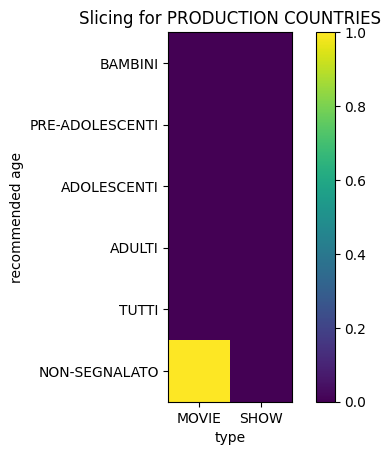

In [328]:
# PRODUCTION COUNTRIES

variabile = 8
# 0, 1, 2, 3, 4, 5, 6, 7, 9 - ATTENZIONE 8 equivale a 9!

production_countries = OLAP[variabile,:,:] 
plt.figure()
plt.imshow(production_countries)
plt.title('Slicing for PRODUCTION COUNTRIES')
plt.colorbar()
plt.xlabel('type')
labels = ['MOVIE', 'SHOW']
plt.xticks(range(len(labels)), labels)
plt.ylabel('recommended age')
labels = ['BAMBINI', 'PRE-ADOLESCENTI', 'ADOLESCENTI', 'ADULTI', 'TUTTI', 'NON-SEGNALATO']
plt.yticks(range(len(labels)), labels)

plt.show()

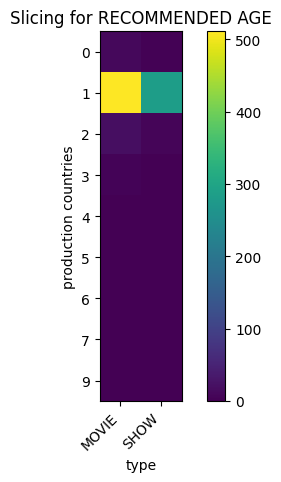

In [329]:
# RECOMMENDED AGE

variabile = 3
# 0 = BAMBINI, 1 = ADOLESCENTI, 2 = PRE-ADOLESCENTI, 3 = TUTTI, 4 = NON-SEGNALATO, 5 = ADULTI ]

recommended_age = OLAP[:,variabile,:]

plt.figure()
plt.imshow(recommended_age) 
plt.colorbar()
plt.title('Slicing for RECOMMENDED AGE')
plt.xlabel('type')
labels = ['MOVIE', 'SHOW']
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('production countries')
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '9']
plt.yticks(range(len(labels)), labels)
plt.show()

In [330]:
percentuali_nulli(titles)

id                       0.00
title                    0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 83.69
imdb_id                  9.15
imdb_score              12.60
imdb_votes              12.79
tmdb_popularity          4.58
tmdb_score              17.63
director                65.83
cast                    61.54
date_added              91.16
duration                58.14
recommended_age         37.57
type                     0.00
release_year             0.00
description              0.79
month_added             91.16
year_added              91.16
genres_number            0.00
num_countries            0.00
recommended_age_q        0.00
dtype: float64


## Metodi predittivi

Descrittore composto da
- imdb_score
- tmdbs_score
- tmdbs_popularity
- runtime


Amazon è usata come piattaforma di addestramento(training) e Disney per il test per predirre il campo type, MOVIE o SHOW

In [331]:
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [332]:
# sostituisco valori nulli con le relative medie
imputer_amazon = SimpleImputer(strategy='mean')
X_amazon_train_imputed = imputer_amazon.fit_transform(amazon_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']])
amazon_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']] = X_amazon_train_imputed

imputer_disney = SimpleImputer(strategy='mean')
X_disney_test_imputed = imputer_disney.fit_transform(disney_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']])
disney_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']] = X_disney_test_imputed


In [333]:
# regressione logistica

X_amazon_train = amazon_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]
y_amazon_train = amazon_titles_combinata['type']

X_disney_test = disney_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]
y_disney_test = disney_titles_combinata['type']

clf = LogisticRegression()
clf.fit(X_amazon_train, y_amazon_train) # addestramento

# predizione
predictions_amazon_train = clf.predict(X_amazon_train)
accuracy_amazon_train = accuracy_score(y_amazon_train, predictions_amazon_train)
print(f"Accuracy on Amazon Training Set: {accuracy_amazon_train}")

predictions_disney_test = clf.predict(X_disney_test)
accuracy_disney_test = accuracy_score(y_disney_test, predictions_disney_test)
print(f"Accuracy on Disney Test Set: {accuracy_disney_test}")


Accuracy on Amazon Training Set: 0.9500876464618507
Accuracy on Disney Test Set: 0.7679738562091504


In [334]:
# valutazione amazon - movie
accuracy = accuracy_score(y_amazon_train, predictions_amazon_train)
precision = precision_score(y_amazon_train, predictions_amazon_train, pos_label='MOVIE')
recall = recall_score(y_amazon_train, predictions_amazon_train, pos_label='MOVIE')
f1 = f1_score(y_amazon_train, predictions_amazon_train, pos_label='MOVIE')
conf_matrix = confusion_matrix(y_amazon_train, predictions_amazon_train)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9500876464618507
Precision: 0.9668655444278713
Recall: 0.9752821063944116
F1-score: 0.9710555882510298
Confusion Matrix:
[[9075  230]
 [ 311 1223]]


In [335]:
# valutazione amazon - show
accuracy = accuracy_score(y_amazon_train, predictions_amazon_train)
precision = precision_score(y_amazon_train, predictions_amazon_train, pos_label='SHOW')
recall = recall_score(y_amazon_train, predictions_amazon_train, pos_label='SHOW')
f1 = f1_score(y_amazon_train, predictions_amazon_train, pos_label='SHOW')
conf_matrix = confusion_matrix(y_amazon_train, predictions_amazon_train)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9500876464618507
Precision: 0.8417068134893324
Recall: 0.7972620599739244
F1-score: 0.8188818212253096
Confusion Matrix:
[[9075  230]
 [ 311 1223]]


In [336]:
# valutazione disney - movie
accuracy = accuracy_score(y_disney_test, predictions_disney_test)
precision = precision_score(y_disney_test, predictions_disney_test, pos_label='MOVIE')
recall = recall_score(y_disney_test, predictions_disney_test, pos_label='MOVIE')
f1 = f1_score(y_disney_test, predictions_disney_test, pos_label='MOVIE')
conf_matrix = confusion_matrix(y_disney_test, predictions_disney_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7679738562091504
Precision: 0.964968152866242
Recall: 0.6981566820276498
F1-score: 0.8101604278074866
Confusion Matrix:
[[909 393]
 [ 33 501]]


In [337]:
# valutazione disney - show
accuracy = accuracy_score(y_disney_test, predictions_disney_test)
precision = precision_score(y_disney_test, predictions_disney_test, pos_label='SHOW')
recall = recall_score(y_disney_test, predictions_disney_test, pos_label='SHOW')
f1 = f1_score(y_disney_test, predictions_disney_test, pos_label='SHOW')
conf_matrix = confusion_matrix(y_disney_test, predictions_disney_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7679738562091504
Precision: 0.5604026845637584
Recall: 0.9382022471910112
F1-score: 0.7016806722689076
Confusion Matrix:
[[909 393]
 [ 33 501]]


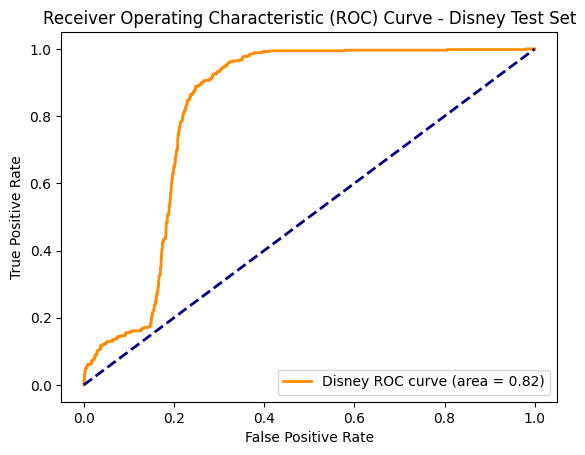

In [338]:
# rappresentazione grafica
y_disney_test_bin = label_binarize(y_disney_test, classes=['MOVIE', 'SHOW'])
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_amazon_train, y_amazon_train).decision_function(X_disney_test)

fpr, tpr, _ = roc_curve(y_disney_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Disney ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Disney Test Set')
plt.legend(loc='lower right')
plt.show()
